<a href="https://colab.research.google.com/github/Cherznan/WildFire-Shape_Analysis/blob/main/%E0%B9%81%E0%B8%A2%E0%B8%81%E0%B8%A7%E0%B8%B1%E0%B8%99_Senior_Fire_VIIRS(NOAA%2BSUOMI)_dateMar23_Mar24_Test_DBscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

In [ ]:
Data1 = pd.read_csv('https://raw.githubusercontent.com/Cherznan/WildFire-Shape_Analysis/main/Data/fire_nrt_J1V-C2_392615.csv')
Data1 = pd.DataFrame(Data1)
Data1.head(5)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,12.48258,102.76917,344.09,0.40,0.44,1/3/2023,646,1,VIIRS,n,2.0NRT,298.73,4.44,D
1,11.45989,99.46227,335.40,0.41,0.37,1/3/2023,646,1,VIIRS,n,2.0NRT,300.46,3.69,D
2,7.83073,99.19322,332.63,0.39,0.36,1/3/2023,646,1,VIIRS,n,2.0NRT,295.41,2.66,D
3,8.49370,99.02063,333.01,0.39,0.36,1/3/2023,646,1,VIIRS,n,2.0NRT,289.02,3.77,D
4,12.47792,102.73333,343.25,0.40,0.44,1/3/2023,646,1,VIIRS,n,2.0NRT,299.43,6.29,D


In [ ]:
Data1 = Data1.query("acq_date=='23/3/2023'or acq_date=='24/3/2023'")
Data1

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
35780,13.35049,102.24339,339.67,0.41,0.37,23/3/2023,633,1,VIIRS,n,2.0NRT,307.59,5.80,D
35781,12.91180,99.83150,335.07,0.39,0.36,23/3/2023,633,1,VIIRS,n,2.0NRT,303.73,3.23,D
35782,12.46189,102.75201,335.45,0.42,0.38,23/3/2023,633,1,VIIRS,n,2.0NRT,302.05,1.74,D
35783,13.21946,99.64552,332.32,0.39,0.36,23/3/2023,633,1,VIIRS,l,2.0NRT,305.45,2.92,D
35784,13.08991,101.18250,337.80,0.39,0.36,23/3/2023,633,1,VIIRS,n,2.0NRT,305.33,2.66,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49259,7.99463,99.07861,310.86,0.39,0.36,24/3/2023,1851,1,VIIRS,n,2.0NRT,287.58,0.87,N
49260,8.10218,99.02031,307.40,0.39,0.36,24/3/2023,1851,1,VIIRS,n,2.0NRT,288.37,0.55,N
49261,8.26140,99.28442,306.80,0.39,0.36,24/3/2023,1851,1,VIIRS,n,2.0NRT,289.53,0.54,N
49262,8.51437,99.03471,305.08,0.39,0.36,24/3/2023,1851,1,VIIRS,n,2.0NRT,289.15,0.58,N


In [ ]:
Data1['acq_date'] = pd.to_datetime(Data1['acq_date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
Data1

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
35780,13.35049,102.24339,339.67,0.41,0.37,2023-03-23,633,1,VIIRS,n,2.0NRT,307.59,5.80,D
35781,12.91180,99.83150,335.07,0.39,0.36,2023-03-23,633,1,VIIRS,n,2.0NRT,303.73,3.23,D
35782,12.46189,102.75201,335.45,0.42,0.38,2023-03-23,633,1,VIIRS,n,2.0NRT,302.05,1.74,D
35783,13.21946,99.64552,332.32,0.39,0.36,2023-03-23,633,1,VIIRS,l,2.0NRT,305.45,2.92,D
35784,13.08991,101.18250,337.80,0.39,0.36,2023-03-23,633,1,VIIRS,n,2.0NRT,305.33,2.66,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49259,7.99463,99.07861,310.86,0.39,0.36,2023-03-24,1851,1,VIIRS,n,2.0NRT,287.58,0.87,N
49260,8.10218,99.02031,307.40,0.39,0.36,2023-03-24,1851,1,VIIRS,n,2.0NRT,288.37,0.55,N
49261,8.26140,99.28442,306.80,0.39,0.36,2023-03-24,1851,1,VIIRS,n,2.0NRT,289.53,0.54,N
49262,8.51437,99.03471,305.08,0.39,0.36,2023-03-24,1851,1,VIIRS,n,2.0NRT,289.15,0.58,N


In [ ]:
Data2 = pd.read_csv('https://raw.githubusercontent.com/Cherznan/WildFire-Shape_Analysis/main/Data/fire_nrt_SV-C2_392616.csv')
Data2 = pd.DataFrame(Data2)
Data2

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,19.72631,98.61388,333.40,0.38,0.59,2023-03-01,559,N,VIIRS,n,2.0NRT,296.90,2.09,D
1,12.23026,102.72812,352.24,0.56,0.52,2023-03-01,559,N,VIIRS,n,2.0NRT,300.89,30.75,D
2,12.23596,102.73261,342.10,0.56,0.52,2023-03-01,559,N,VIIRS,n,2.0NRT,297.92,13.40,D
3,12.23612,102.72995,343.80,0.56,0.52,2023-03-01,559,N,VIIRS,n,2.0NRT,296.58,11.73,D
4,11.68402,102.91515,330.63,0.56,0.51,2023-03-01,559,N,VIIRS,n,2.0NRT,293.99,3.57,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117343,17.69958,98.39622,300.48,0.43,0.62,2023-04-30,1947,N,VIIRS,n,2.0NRT,286.69,0.37,N
117344,19.41166,98.57944,305.98,0.41,0.61,2023-04-30,1947,N,VIIRS,n,2.0NRT,286.86,0.63,N
117345,19.40620,98.57790,298.61,0.41,0.61,2023-04-30,1947,N,VIIRS,n,2.0NRT,286.67,0.78,N
117346,19.40553,98.58102,312.11,0.41,0.61,2023-04-30,1947,N,VIIRS,n,2.0NRT,286.82,0.78,N


In [ ]:
Data2 = Data2.query("acq_date=='2023-03-23'or acq_date=='2023-03-24'")
Data2

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
33192,15.33173,103.83069,330.31,0.34,0.56,2023-03-23,546,N,VIIRS,l,2.0NRT,301.63,1.50,D
33193,15.38166,104.13737,330.90,0.32,0.55,2023-03-23,546,N,VIIRS,l,2.0NRT,301.41,1.22,D
33194,15.38432,104.28197,330.66,0.63,0.54,2023-03-23,546,N,VIIRS,l,2.0NRT,301.02,6.38,D
33195,13.95496,100.48232,336.44,0.59,0.70,2023-03-23,546,N,VIIRS,n,2.0NRT,293.50,5.82,D
33196,14.46185,102.76017,367.00,0.41,0.61,2023-03-23,546,N,VIIRS,h,2.0NRT,295.93,10.59,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39390,14.74354,98.35371,301.95,0.38,0.59,2023-03-24,1942,N,VIIRS,n,2.0NRT,291.08,0.57,N
39391,14.72272,98.26252,304.54,0.38,0.59,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.22,1.15,N
39392,14.56945,98.92682,304.28,0.42,0.61,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.23,0.99,N
39393,14.45906,98.63901,303.96,0.41,0.60,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.61,0.93,N


In [ ]:
Data = pd.concat([Data1, Data2], ignore_index=True)
Data

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,13.35049,102.24339,339.67,0.41,0.37,2023-03-23,633,1,VIIRS,n,2.0NRT,307.59,5.80,D
1,12.91180,99.83150,335.07,0.39,0.36,2023-03-23,633,1,VIIRS,n,2.0NRT,303.73,3.23,D
2,12.46189,102.75201,335.45,0.42,0.38,2023-03-23,633,1,VIIRS,n,2.0NRT,302.05,1.74,D
3,13.21946,99.64552,332.32,0.39,0.36,2023-03-23,633,1,VIIRS,l,2.0NRT,305.45,2.92,D
4,13.08991,101.18250,337.80,0.39,0.36,2023-03-23,633,1,VIIRS,n,2.0NRT,305.33,2.66,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19682,14.74354,98.35371,301.95,0.38,0.59,2023-03-24,1942,N,VIIRS,n,2.0NRT,291.08,0.57,N
19683,14.72272,98.26252,304.54,0.38,0.59,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.22,1.15,N
19684,14.56945,98.92682,304.28,0.42,0.61,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.23,0.99,N
19685,14.45906,98.63901,303.96,0.41,0.60,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.61,0.93,N


In [ ]:
Data23 = Data.query("acq_date=='2023-03-23'")
Data23

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,13.35049,102.24339,339.67,0.41,0.37,2023-03-23,633,1,VIIRS,n,2.0NRT,307.59,5.80,D
1,12.91180,99.83150,335.07,0.39,0.36,2023-03-23,633,1,VIIRS,n,2.0NRT,303.73,3.23,D
2,12.46189,102.75201,335.45,0.42,0.38,2023-03-23,633,1,VIIRS,n,2.0NRT,302.05,1.74,D
3,13.21946,99.64552,332.32,0.39,0.36,2023-03-23,633,1,VIIRS,l,2.0NRT,305.45,2.92,D
4,13.08991,101.18250,337.80,0.39,0.36,2023-03-23,633,1,VIIRS,n,2.0NRT,305.33,2.66,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16171,17.00276,98.66553,300.28,0.73,0.76,2023-03-23,2000,N,VIIRS,n,2.0NRT,289.30,1.63,N
16172,15.14100,98.54607,309.14,0.78,0.78,2023-03-23,2000,N,VIIRS,n,2.0NRT,291.37,3.48,N
16173,15.14004,98.55025,304.76,0.78,0.78,2023-03-23,2000,N,VIIRS,n,2.0NRT,291.11,2.68,N
16174,15.13894,98.55505,307.92,0.78,0.78,2023-03-23,2000,N,VIIRS,n,2.0NRT,290.98,2.68,N


In [ ]:
Data24 = Data.query("acq_date=='2023-03-24'")
Data24

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
7307,6.58963,101.26146,330.10,0.42,0.45,2023-03-24,614,1,VIIRS,n,2.0NRT,295.57,2.88,D
7308,7.80181,98.97938,331.36,0.57,0.52,2023-03-24,614,1,VIIRS,n,2.0NRT,293.07,5.57,D
7309,6.34953,101.92725,330.67,0.38,0.43,2023-03-24,614,1,VIIRS,n,2.0NRT,299.13,3.34,D
7310,16.25200,102.06484,353.87,0.43,0.38,2023-03-24,616,1,VIIRS,n,2.0NRT,309.20,22.26,D
7311,15.78069,99.26958,344.79,0.40,0.44,2023-03-24,616,1,VIIRS,n,2.0NRT,303.64,4.20,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19682,14.74354,98.35371,301.95,0.38,0.59,2023-03-24,1942,N,VIIRS,n,2.0NRT,291.08,0.57,N
19683,14.72272,98.26252,304.54,0.38,0.59,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.22,1.15,N
19684,14.56945,98.92682,304.28,0.42,0.61,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.23,0.99,N
19685,14.45906,98.63901,303.96,0.41,0.60,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.61,0.93,N


In [ ]:
Data23['id'] = range(1, len(Data23) + 1)
Data24['id'] = range(1, len(Data24) + 1)


<ipython-input-11-1aa787b8db7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data23['id'] = range(1, len(Data23) + 1)
<ipython-input-11-1aa787b8db7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data24['id'] = range(1, len(Data24) + 1)


In [ ]:
import pandas as pd
# กำหนดขอบเขตของพื้นที่เป็นสี่เหลี่ยม
min_lat, max_lat = 18.40859, 18.73161
min_lon, max_lon = 100.13453, 100.7547

# ครอบตัดข้อมูลตามขอบเขต
Data23 = Data23[(Data23['latitude'] >= min_lat) & (Data23['latitude'] <= max_lat) & (Data23['longitude'] >= min_lon) & (Data23['longitude'] <= max_lon)]

Data24 = Data24[(Data24['latitude'] >= min_lat) & (Data24['latitude'] <= max_lat) & (Data24['longitude'] >= min_lon) & (Data24['longitude'] <= max_lon)]

In [ ]:
pip install utm

  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=7325eb03ceb1735d34aeebfce8d669da411dc24e6a61547b8486fbde9f3a0adb
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [ ]:
import utm

In [ ]:
Data23t = Data23.loc[:,['latitude','longitude','acq_date']]
Data24t = Data24.loc[:,['latitude','longitude','acq_date']]


In [ ]:
Data23 = Data23.loc[:,['latitude','longitude']]
Data24 = Data24.loc[:,['latitude','longitude']]
Data23

,latitude,longitude
80,18.69394,100.39851
81,18.69447,100.40218
85,18.69114,100.40276
86,18.72122,100.60859
92,18.65906,100.20751
...,...,...
15405,18.47460,100.46135
15406,18.47384,100.36302
15407,18.47343,100.36697
15408,18.46864,100.30608


In [ ]:
Data23['utm'] = Data23.apply(lambda row: utm.from_latlon(*row), axis=1)
utm_cols = ['easting', 'northing', 'zone_number', 'zone_letter']
for n, col in enumerate(utm_cols):
    Data23[col] = Data23['utm'].apply(lambda location: location[n])
Data23 = Data23.drop('utm', axis=1)
Data23

,latitude,longitude,easting,northing,zone_number,zone_letter
80,18.69394,100.39851,647471.760669,2.067540e+06,47,Q
81,18.69447,100.40218,647858.360782,2.067602e+06,47,Q
85,18.69114,100.40276,647922.423244,2.067234e+06,47,Q
86,18.72122,100.60859,669601.685575,2.070746e+06,47,Q
92,18.65906,100.20751,627354.442890,2.063533e+06,47,Q
...,...,...,...,...,...,...
15405,18.47460,100.46135,654296.674814,2.043318e+06,47,Q
15406,18.47384,100.36302,643913.500678,2.043153e+06,47,Q
15407,18.47343,100.36697,644330.965299,2.043111e+06,47,Q
15408,18.46864,100.30608,637904.831706,2.042533e+06,47,Q


In [ ]:
Data24['utm'] = Data24.apply(lambda row: utm.from_latlon(*row), axis=1)
utm_cols = ['easting', 'northing', 'zone_number', 'zone_letter']
for n, col in enumerate(utm_cols):
    Data24[col] = Data24['utm'].apply(lambda location: location[n])
Data24 = Data24.drop('utm', axis=1)
Data24

,latitude,longitude,easting,northing,zone_number,zone_letter
7935,18.69580,100.27121,634044.763036,2.067646e+06,47,Q
7950,18.73118,100.43123,650889.590021,2.071689e+06,47,Q
8265,18.47222,100.58942,667823.943668,2.043169e+06,47,Q
8269,18.48969,100.67027,676344.773161,2.045180e+06,47,Q
8310,18.44765,100.55426,664134.085585,2.040418e+06,47,Q
...,...,...,...,...,...,...
19285,18.68536,100.54259,662675.875815,2.066716e+06,47,Q
19290,18.66051,100.60039,668797.099854,2.064019e+06,47,Q
19291,18.65593,100.59383,668109.569554,2.063506e+06,47,Q
19293,18.66474,100.50011,658214.396628,2.064395e+06,47,Q


In [ ]:
Data23 = Data23.merge(Data23t, on=['latitude', 'longitude'], how='inner')
Data24 = Data24.merge(Data24t, on=['latitude', 'longitude'], how='inner')
Data23

,latitude,longitude,easting,northing,zone_number,zone_letter,acq_date
0,18.69394,100.39851,647471.760669,2.067540e+06,47,Q,2023-03-23
1,18.69447,100.40218,647858.360782,2.067602e+06,47,Q,2023-03-23
2,18.69114,100.40276,647922.423244,2.067234e+06,47,Q,2023-03-23
3,18.72122,100.60859,669601.685575,2.070746e+06,47,Q,2023-03-23
4,18.65906,100.20751,627354.442890,2.063533e+06,47,Q,2023-03-23
...,...,...,...,...,...,...,...
273,18.47460,100.46135,654296.674814,2.043318e+06,47,Q,2023-03-23
274,18.47384,100.36302,643913.500678,2.043153e+06,47,Q,2023-03-23
275,18.47343,100.36697,644330.965299,2.043111e+06,47,Q,2023-03-23
276,18.46864,100.30608,637904.831706,2.042533e+06,47,Q,2023-03-23


In [ ]:
Data23['id'] = range(1, len(Data23) + 1)
Data24['id'] = range(1, len(Data24) + 1)

In [ ]:
Point23 = []
Point23 = Data23[['easting', 'northing','acq_date']].values.tolist()
Point24 = []
Point24 = Data24[['easting', 'northing','acq_date']].values.tolist()

In [ ]:
data23 = Point23
data24 = Point24

In [ ]:
import pandas as pd
import seaborn as sns
import folium as fo

In [ ]:
import geopandas
from shapely.geometry import Point

In [ ]:
import altair as alt


latitudes = list(Data23.latitude)
longitudes = list(Data23.longitude)
id = list(Data23.id)

ptstart = [13.736717,100.523186]
map23 = fo.Map(
                location = ptstart,
                zoom_start = 5)

for lat, lng, sensorid in zip(latitudes, longitudes, id):
    popup = fo.Popup(max_width=500) #create blank popup
    fo.CircleMarker(
      location = [lat, lng],
      popup = popup,
      radius = 5,
      color='#f56042',
      fill=True,
      fill_opacity=1
     ).add_to(map23)

#----------------------------------

latitudes = list(Data24.latitude)
longitudes = list(Data24.longitude)
id = list(Data24.id)

ptstart = [13.736717,100.523186]
map24 = fo.Map(
                location = ptstart,
                zoom_start = 5)

for lat, lng, sensorid in zip(latitudes, longitudes, id):
    popup = fo.Popup(max_width=500) #create blank popup
    fo.CircleMarker(
      location = [lat, lng],
      popup = popup,
      radius = 5,
      color='#f56043',
      fill=True,
      fill_opacity=1
     ).add_to(map24)

In [ ]:
map23

In [ ]:
map24

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
for point23 in data23:
    point23[2] = datetime.strptime(point23[2], '%Y-%m-%d').date()

for point24 in data24:
    point24[2] = datetime.strptime(point24[2], '%Y-%m-%d').date()

In [ ]:
data23 = np.array(data23)
data24 = np.array(data24)

In [ ]:
eps = 1000  # รัศมีสำหรับการค้นหา
min_samples = 5  # จำนวนขั้นต่ำของจุดในกลุม

dbscan23 = DBSCAN(eps=eps, min_samples=min_samples)
dbscan24 = DBSCAN(eps=eps, min_samples=min_samples)

In [ ]:
dbscan23.fit(data23[:, :2])  # Use only the x and y coordinates for clustering
dbscan24.fit(data24[:, :2])  # Use only the x and y coordinates for clustering

DBSCAN(eps=1000)

In [ ]:
labels23 = dbscan23.labels_

# Print cluster labels
print("Cluster Labels:", labels23)

Cluster Labels: [ 0  0  0 -1  1  0  0  1  0  0 -1 -1  2  3  3  3 -1  4  4 -1  5  5 -1  5
 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1  7  7 -1  7  7  7  7  7 -1 -1 -1 -1 -1
  7 -1 -1  8  8  9  9  8  8  8 -1 -1  8 10 10 10  3  3  2 -1 -1 11 -1 11
 -1 -1 -1 12 -1 12 12 -1 -1 -1 -1 -1 13 -1 -1 -1 -1 -1 -1 -1 14 14 14 14
 14 -1 -1 -1 -1 -1 12 12 -1 12 -1 -1 14 13 -1 13  4  4 15 15 15 16 15 15
  7 16 16 -1 16 -1  5 -1  1  1  1  1 -1  1 11 -1  6  6 -1 -1 -1 -1 -1 -1
  2  2  2  2  2  2 -1  2 -1 -1 10 10 10 10 10 10 10 10 10 10  9  9 -1 -1
 -1 -1 -1 -1 -1 -1  8  8 -1  2  2 -1  2 17 17 -1 -1 -1  5 -1 -1 17  2 17
 18 18 -1 -1 -1 -1  7  6 10 10 10 10 10  9  9 10 10 10  9  9 14 14 14 -1
 14 -1 -1 -1 -1  7  6 -1  3  3  3 -1  3 -1 -1  9  9 -1  1  6 11 11 -1 -1
 -1 -1 18 18 18  0 17 17 -1 -1 -1 -1  1 -1  5 -1 -1 -1 16 -1 15  4 15 15
 13 13 13 13 14  8 -1 -1 -1 -1 10 10 -1 12]


In [ ]:
labels24 = dbscan24.labels_

# Print cluster labels
print("Cluster Labels:", labels24)

Cluster Labels: [-1 -1 -1 -1  0  0  0 -1  1 -1  1  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1 -1
 -1  3  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4  4  4 -1 -1 -1 -1 -1 -1  5  6
  7  7  7  7  5  5  5  6  7  7  7  7 -1  8  8  8  8  9 -1  8  8  9  8  9
 -1 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  2 11 11 11  0  0  2 11 -1
  2 -1  2  2 -1 -1 -1 -1 -1 -1  3 -1  3 -1 12 -1 12 -1 12 12 -1 -1 -1  2
  2 -1 -1 -1 -1 -1 13 13 -1 -1  6  7  6 -1 -1 -1 -1  5 -1  8 -1  8  8 -1
 -1  8  8  8  8 -1 -1 -1 -1 10 -1 -1  8  8  8 -1  8 10  8 -1  8  8 -1 -1
  8 -1 -1 -1 -1 -1 -1 -1 -1  9  9 -1 -1  9 14 14 14  9 14  8  9  9 14 14
 -1 -1  8  8 -1 -1 10 -1 10  9  9  9  9  8  8  7  7  6  7  7 -1 -1 -1  2
  2  2  2  2  9 -1  1  1  1  1 -1 -1  4  4 -1 -1  4 -1 -1  3  3 -1 -1 -1
 11 -1  8  8  8  8  8  8  8  8 -1  8  8  8  8  8  5  2 -1 -1  2 -1  9 13
 13 12 13 12 -1  2  2  2  2  2  8 10  8  8  9  8]


In [ ]:
n_clusters23 = len(set(labels23)) - (1 if -1 in labels23 else 0)  # คำนวณจำนวนกลุ่มโดยไม่นับกลุ่มของจุดเดียว (กลุ่มที่ไม่มีนัยสำคัญ)
print("จำนวนกลุ่ม:", n_clusters23)
n_clusters24 = len(set(labels24)) - (1 if -1 in labels24 else 0)  # คำนวณจำนวนกลุ่มโดยไม่นับกลุ่มของจุดเดียว (กลุ่มที่ไม่มีนัยสำคัญ)
print("จำนวนกลุ่ม:", n_clusters24)

จำนวนกลุ่ม: 19
จำนวนกลุ่ม: 15


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


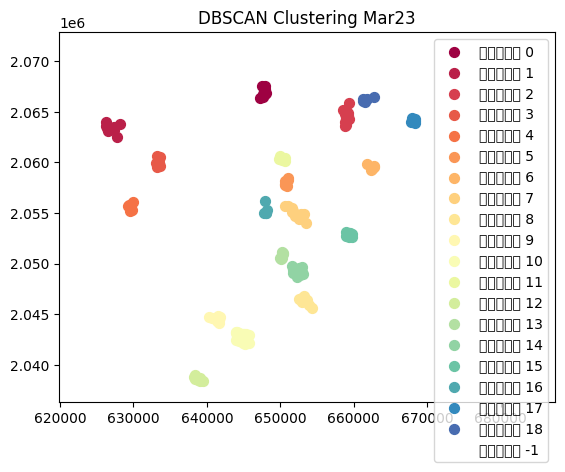

In [ ]:
unique_labels23 = set(labels23)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels23))]

for label, color in zip(unique_labels23, colors):
    if label == -1:
        # กลุ่มข้อมูลที่ไม่มีการกำหนด
        color = [0, 0, 0, 0]

    class_member_mask = (labels23 == label)

    xy = data23[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[color], label=f'กลุ่ม {label}')

plt.title('DBSCAN Clustering Mar23')
plt.legend()
plt.show()

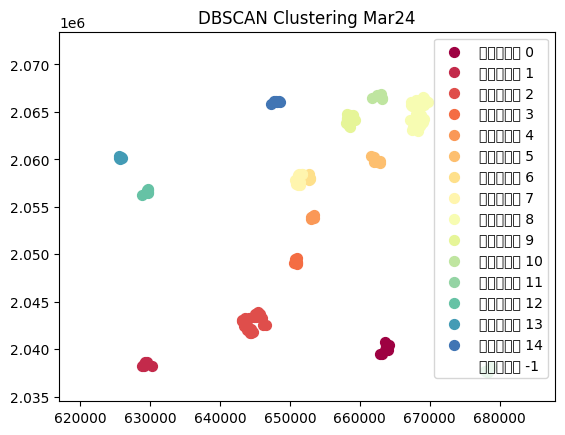

In [ ]:
unique_labels24 = set(labels24)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels24))]

for label, color in zip(unique_labels24, colors):
    if label == -1:
        # กลุ่มข้อมูลที่ไม่มีการกำหนด
        color = [0, 0, 0, 0]

    class_member_mask = (labels24 == label)

    xy = data24[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[color], label=f'กลุ่ม {label}')

plt.title('DBSCAN Clustering Mar24')
plt.legend()
plt.show()